<a href="https://colab.research.google.com/github/redjules/google-casual-impact/blob/main/Google_Casual_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and Dates

In [86]:
# install libraries
!pip install yfinance
!pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
#import libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
#Dates
training_start = "2020-09-01"
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = "2020-10-23"
end_stock = "2020-10-24"

#Loading financial data

In [89]:
#Bitcoin
y = ["BTC-USD"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1d")
y =y['Adj Close'].rename('y')
y[:1]

[*********************100%***********************]  1 of 1 completed


Date
2020-09-01    11970.478516
Name: y, dtype: float64

In [90]:
#Load more stock data
stocks = ["ZAL.DE","SQ","CRSP","TRMB","JD","DE","KTOS","GOOG"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval="1d")


[*********************100%***********************]  8 of 8 completed


#Data Preparation

In [91]:
X.head()

Adj Close                                               \
                 CRSP          DE       GOOG         JD       KTOS   
Date                                                                 
2020-09-01  93.419998  210.679596  83.035500  79.267685  19.700001   
2020-09-02  93.930000  210.118240  86.414001  79.959564  19.910000   
2020-09-03  85.690002  204.021149  82.092003  75.952454  19.520000   
2020-09-04  82.019997  204.534088  79.552002  76.874954  19.260000   
2020-09-07        NaN         NaN        NaN        NaN        NaN   

                                                  Close              ...  \
                    SQ       TRMB     ZAL.DE       CRSP          DE  ...   
Date                                                                 ...   
2020-09-01  166.660004  53.410000  77.000000  93.419998  217.690002  ...   
2020-09-02  162.880005  54.310001  77.000000  93.930000  217.110001  ...   
2020-09-03  152.860001  50.900002  75.080002  85.690002  210.809998  ...   
2020-09-04  146.389999  49.959999  71.739998  82.019997  211.339996  ...   
2020-09-07         NaN        NaN  74.000000        NaN         NaN  ...   

                 Open                Volume                         \
                 TRMB     ZAL.DE       CRSP         DE        GOOG   
Date                                                                 
2020-09-01  52.669998  74.959999   779500.0  1873400.0  36506000.0   
2020-09-02  53.779999  77.500000   532000.0  1983000.0  50224000.0   
2020-09-03  54.130001  77.260002  1278900.0  1975200.0  62156000.0   
2020-09-04  51.040001  74.800003  1570300.0  1662300.0  52172000.0   
2020-09-07        NaN  72.239998        NaN        NaN         NaN   

                                                                  
                    JD       KTOS          SQ       TRMB  ZAL.DE  
Date                                                              
2020-09-01  11431400.0   587600.0  12306400.0   542300.0  790198  
2020-09-02  13860900.0   612800.0  11214800.0   728800.0  496554  
2020-09-03  19254000.0   847100.0  16421200.0  1220300.0  736259  
2020-09-04  21500900.0  1060000.0  17995200.0   914700.0  662250  
2020-09-07         NaN        NaN         NaN        NaN  362062  

[5 rows x 48 columns]

In [92]:
#Getting the adjusted close
X = X.iloc[:,:len(stocks)]
X.head(1)

Adj Close                                                         \
                 CRSP          DE     GOOG         JD       KTOS          SQ   
Date                                                                           
2020-09-01  93.419998  210.679596  83.0355  79.267685  19.700001  166.660004   

                          
             TRMB ZAL.DE  
Date                      
2020-09-01  53.41   77.0

In [93]:
#Removing level
X.columns = X.columns.droplevel()
X.head(1)

,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,
2020-09-01,93.419998,210.679596,83.0355,79.267685,19.700001,166.660004,53.41,77.0


In [94]:
#Time zones
X.index = X.index.tz_localize(None)
X.index


DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23'],
              dtype='datetime64[ns]', name='Date', freq='B')

In [95]:
#Combine everything
df = pd.concat([y,X],axis = 1).dropna()
df.head()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,11970.478516,93.419998,210.679596,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,93.930000,210.118240,86.414001,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,85.690002,204.021149,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,82.019997,204.534088,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,81.459999,203.469513,76.619499,73.242615,19.230000,139.110001,49.139999,73.440002


#Data Analysis section

In [96]:
#Prepare a dataframe with only training data
df_training = df[df.index <= training_end]
df_training.tail(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-10-19,11742.037109,107.720001,231.292236,76.730499,77.461121,20.639999,186.960007,51.970001,85.0


In [97]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x=df_training.y)[1]

#how to read - ifelse

if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is not stationary


In [98]:
#Differencing: substract or divide
differencing = df_training.pct_change().dropna()
differencing.head(2)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-02,-0.046485,0.005459,-0.002664,0.040687,0.008728,0.010660,-0.022681,0.016851,0.000000
2020-09-03,-0.102395,-0.087725,-0.029017,-0.050015,-0.050114,-0.019588,-0.061518,-0.062788,-0.024935


In [99]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x=differencing.y)[1]

#how to read - ifelse

if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is stationary


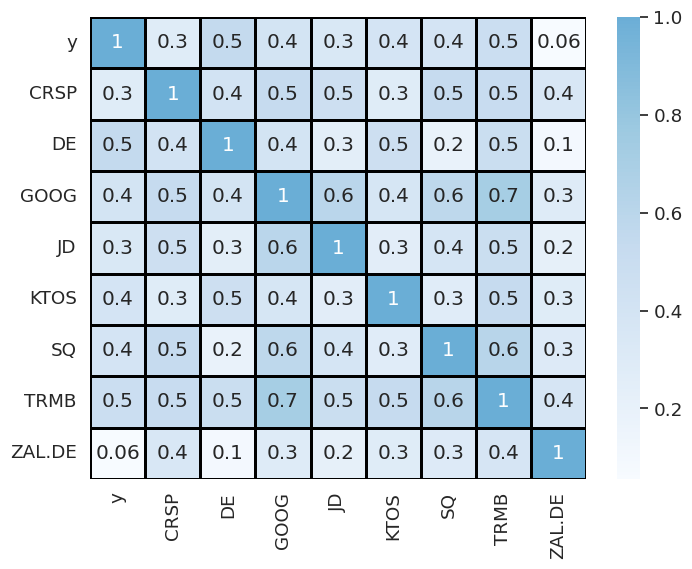

In [100]:
#Correlation Matrix
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(differencing.corr(),
            annot=True,
            fmt='.1g',
            cmap='Blues',
            center= True,
            linewidth = 1,
            linecolor = 'black')
plt.show()

#Causal Impact

In [101]:
df_final = df.drop(columns = ["ZAL.DE"])
df_final.head(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.679596,83.0355,79.267685,19.700001,166.660004,53.41


In [102]:
#Pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

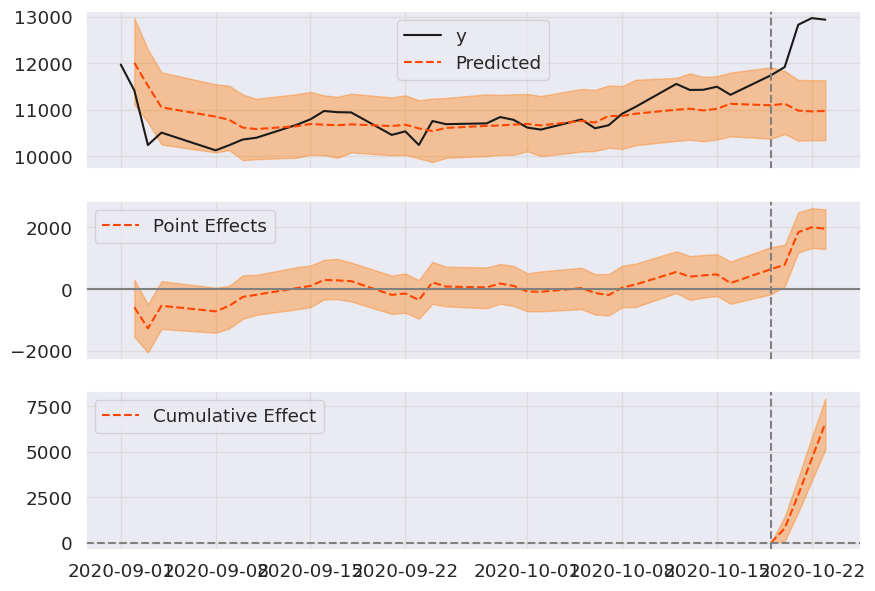

In [103]:
#Google Causal Impact
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

In [104]:
#Summary
print(impact.summary())
#1634


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11013.62 (187.86)  44054.48 (751.45)
95% CI                    [10639.08, 11375.5][42556.34, 45501.98]

Absolute effect (s.d.)    1645.74 (187.86)   6582.97 (751.45)
95% CI                    [1283.87, 2020.28] [5135.47, 8081.12]

Relative effect (s.d.)    14.94% (1.71%)     14.94% (1.71%)
95% CI                    [11.66%, 18.34%]   [11.66%, 18.34%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [105]:
#Summary report
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11013.62.
The 95% interval of this counterfactual prediction is [10639.08, 11375.5].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1645.74 with a 95% interval of
[1283.87, 2020.28]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44054.48. The 95% interval of this prediction is [42556.34, 45501.98].


The above results are given in terms of absolute numbers. In relative
t

## Google Causal Impact Challenge: Volkswagen

In [106]:
#Libraries, Dates and Data
!pip install yfinance
!pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
#import libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
#Download VW stock
y = ["VOW.DE"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1wk")

y=y['Adj Close'].rename("y")
y.head(1)

[*********************100%***********************]  1 of 1 completed


Date
2020-08-31    122.864258
Name: y, dtype: float64

In [109]:
#Download tthe control groups
stocks = ["META","DIS","NVS","AMZ"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1wk")
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- AMZ: No data found for this date range, symbol may be delisted


,AMZ,DIS,META,NVS
Date,,,,
2020-08-31 00:00:00,NaN,131.990005,282.730011,76.655716
2020-09-07 00:00:00,NaN,131.750000,266.609985,79.485634
2020-09-14 00:00:00,NaN,128.630005,252.529999,80.423058
2020-09-21 00:00:00,NaN,124.000000,254.820007,77.035988
2020-09-28 00:00:00,NaN,122.550003,259.940002,77.398567


In [111]:
#Combine everything
X.index = X.index.tz_localize(None)
df = pd.concat([y,X], axis = 1).dropna()
df.head()

AttributeError: ignored

# Correlation Matrix

In [112]:
#Subset the training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-10-13,11425.899414,103.059998,230.369659,78.584000,79.382996,20.959999,190.470001,51.720001,85.820000
2020-10-14,11429.506836,101.370003,231.583572,78.403999,77.931984,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,99.889999,231.360214,77.956497,77.115181,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,109.830002,233.127640,78.650497,78.335571,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,107.720001,231.292236,76.730499,77.461121,20.639999,186.960007,51.970001,85.000000


<Axes: >

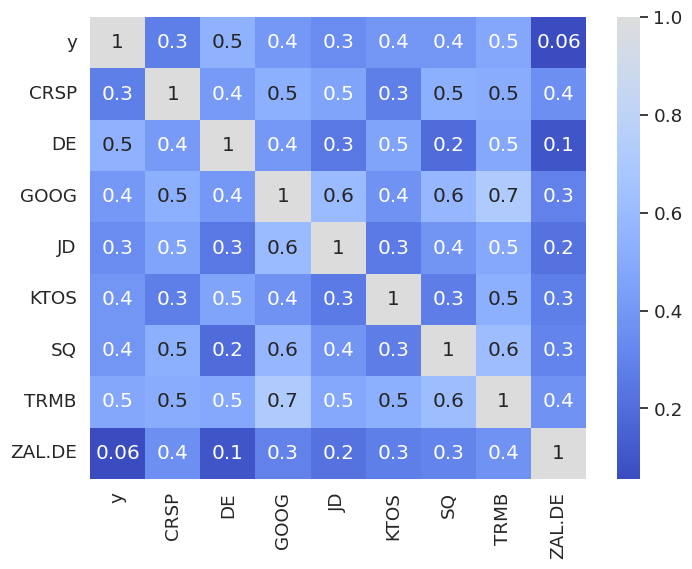

In [113]:
#Heatmap
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm',
            center = True)

In [114]:
#Preparing final df 
df_final = df.drop(columns = ["META","AMZ"])
df_final.head(0)

KeyError: ignored

# Google Causal Impact

In [115]:
#Get first and last date
print(df_final.head(1))
print(df_final.tail(10))

                       y       CRSP          DE     GOOG         JD  \
Date                                                                  
2020-09-01  11970.478516  93.419998  210.679596  83.0355  79.267685   

                 KTOS          SQ   TRMB  
Date                                      
2020-09-01  19.700001  166.660004  53.41  
                       y        CRSP          DE       GOOG         JD  \
Date                                                                     
2020-10-12  11555.363281   99.400002  229.689865  78.457497  81.026199   
2020-10-13  11425.899414  103.059998  230.369659  78.584000  79.382996   
2020-10-14  11429.506836  101.370003  231.583572  78.403999  77.931984   
2020-10-15  11495.349609   99.889999  231.360214  77.956497  77.115181   
2020-10-16  11322.123047  109.830002  233.127640  78.650497  78.335571   
2020-10-19  11742.037109  107.720001  231.292236  76.730499  77.461121   
2020-10-20  11916.334961  106.699997  231.972000  77.796501  79.3

In [116]:
#Dates
training_start = "2014-01-06"
training_end = "2015-08-31"
treatment_start = "2015-09-07"
treatment_end = "2015-09-28"
end_stock = "2015-10-02"

In [117]:
#Define Pre and POst Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [118]:
#CI
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

ValueError: ignored

In [119]:
df_final

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.679596,83.035500,79.267685,19.700001,166.660004,53.410000
2020-09-02,11414.034180,93.930000,210.118240,86.414001,79.959564,19.910000,162.880005,54.310001
2020-09-03,10245.296875,85.690002,204.021149,82.092003,75.952454,19.520000,152.860001,50.900002
2020-09-04,10511.813477,82.019997,204.534088,79.552002,76.874954,19.260000,146.389999,49.959999
2020-09-08,10131.516602,81.459999,203.469513,76.619499,73.242615,19.230000,139.110001,49.139999
2020-09-09,10242.347656,85.250000,208.579498,77.848000,74.174721,19.549999,144.210007,50.110001
2020-09-10,10363.138672,81.800003,208.182663,76.600998,71.618629,19.469999,141.070007,49.160000
2020-09-11,10400.915039,79.980003,209.005310,76.036003,71.282303,19.639999,137.449997,50.160000
2020-09-14,10680.837891,84.709999,211.298996,75.963997,73.598152,20.680000,144.399994,50.430000


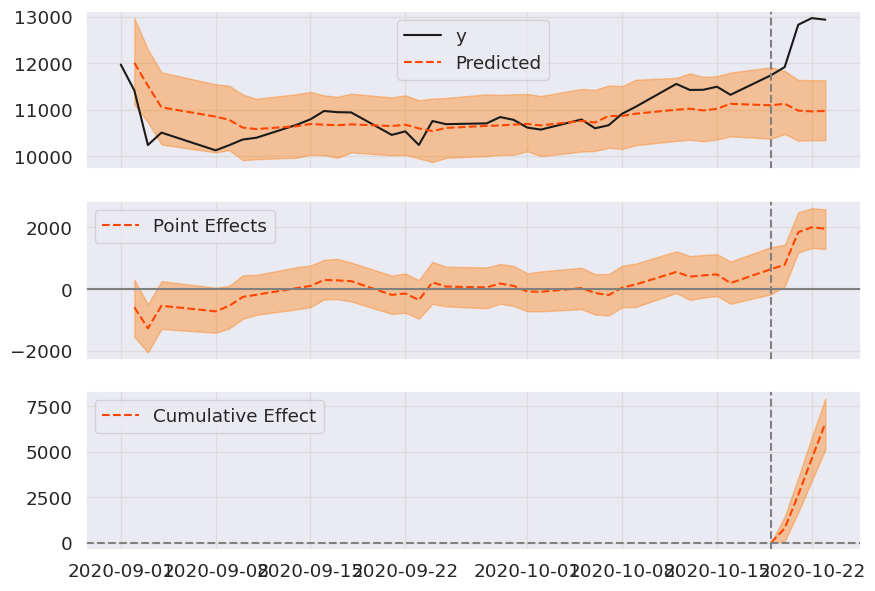

In [120]:
#Output
impact.plot()

In [121]:
#summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11013.62 (187.86)  44054.48 (751.45)
95% CI                    [10639.08, 11375.5][42556.34, 45501.98]

Absolute effect (s.d.)    1645.74 (187.86)   6582.97 (751.45)
95% CI                    [1283.87, 2020.28] [5135.47, 8081.12]

Relative effect (s.d.)    14.94% (1.71%)     14.94% (1.71%)
95% CI                    [11.66%, 18.34%]   [11.66%, 18.34%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
